<a href="https://colab.research.google.com/github/Patel-Aman/stock_price_predictor/blob/main/stock_price_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
stocks = input("Enter the code of the stock:- ")
data = yf.download(stocks, "2008-01-01", "2023-12-20", auto_adjust=True)
data.head()

Enter the code of the stock:- NG=F
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [ ]:
data.shape

(4019, 5)

In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000
mean,3.831751,3.918535,3.740745,3.824872,130837.645932
std,1.875905,1.925253,1.822725,1.871298,54121.052790
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.692000,2.743000,2.641000,2.692500,92467.500000
50%,3.300000,3.361000,3.236000,3.291000,126230.000000
75%,4.302000,4.379500,4.205000,4.294000,160509.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


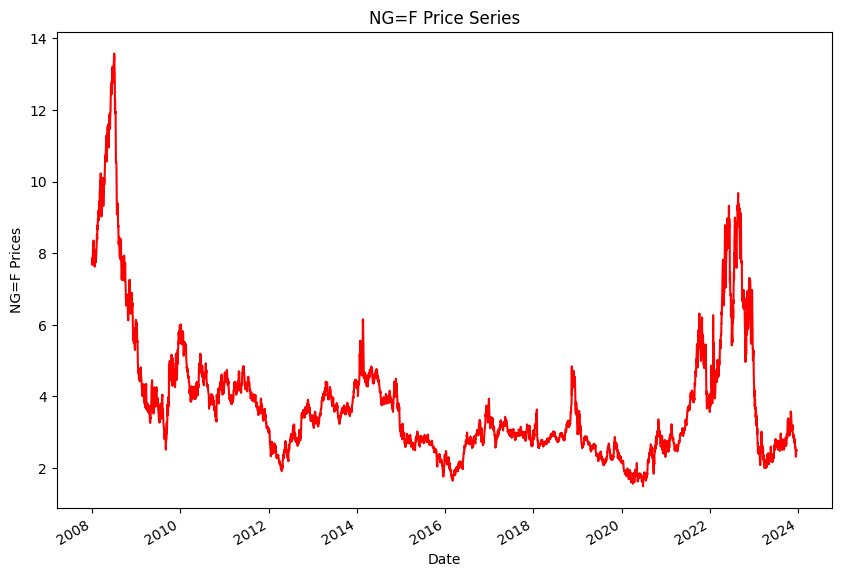

In [ ]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

<Axes: xlabel='Close', ylabel='Count'>

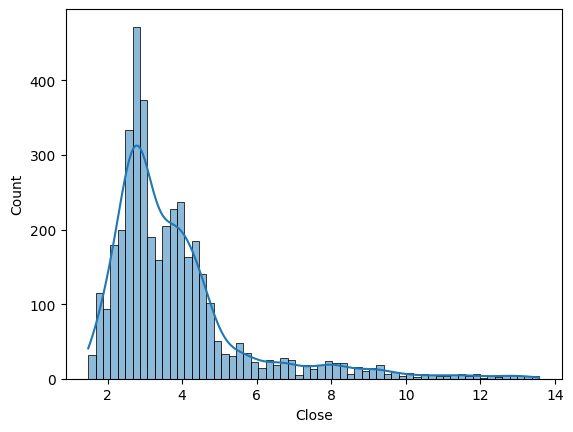

In [ ]:
sns.histplot(data["Close"], kde=True)

<Axes: xlabel='Open', ylabel='Count'>

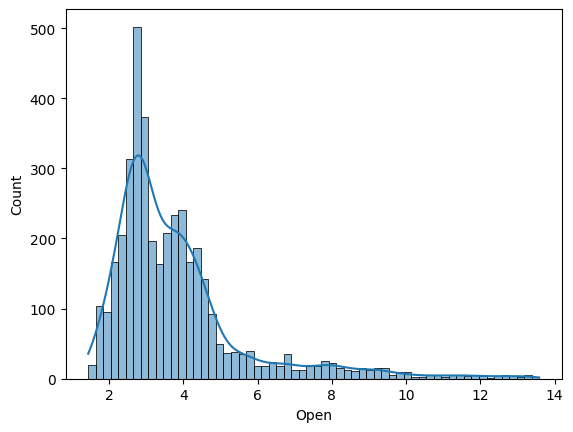

In [ ]:
sns.histplot(data["Open"], kde=True)

<Axes: xlabel='High', ylabel='Count'>

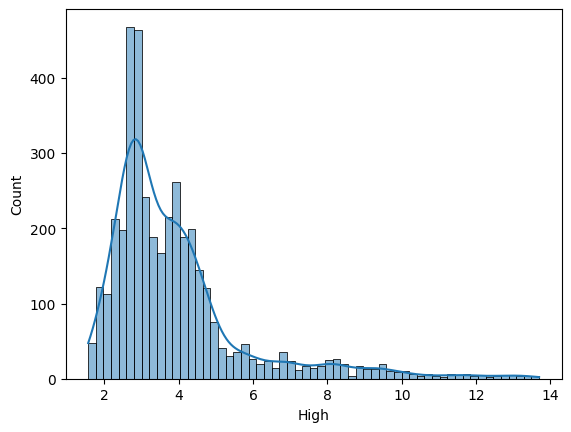

In [ ]:
sns.histplot(data["High"], kde=True)

In [ ]:
# Conlusions

# - Shape the of the data
# - how our data is distributed
# - It's very very non linear

# Linear, Logis, Regularized, SVM

X = data.drop("Close", axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3215, 4)
(804, 4)
(3215,)
(804,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [ ]:
# MSE -- > Mean Squared
# RMSE ---> sart(MSE)
# r2_square ---> 1.0 # good model

from sklearn.metrics import mean_squared_error, r2_score


def calculate_metrics(y_test, y_pred):
    '''
    y_test:- ground truth
    y_pred:- model predict
    '''
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test, y_pred)

    print("MSE:- ", mse)
    print("RMSE:- ", rmse)
    print("R2_score:- ", r2_scors)

calculate_metrics(y_test, pred1)

MSE:-  0.0026540639089334627
RMSE:-  0.05151760775631437
R2_score:-  0.9991514138793524


In [ ]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train )

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

In [ ]:
calculate_metrics(y_test, la_p)

MSE:-  0.24908517803688812
RMSE:-  0.49908433960292536
R2_score:-  0.9203597832630575


In [ ]:
calculate_metrics(y_test, ri_p)

MSE:-  0.0026191344967184554
RMSE:-  0.05117748036703698
R2_score:-  0.9991625818901558


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()


param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.085 total time=   1.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.116 total time=   1.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.038 total time=   0.8s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.081 total time=   0.7s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.064 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.084 total time=   0.9s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.116 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.038 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.080 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.063 total time=   0.4s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.082 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [ ]:
import joblib

joblib.dump(ri, 'model.pkl')

ridge_from_joblib = model = joblib.load("model.pkl")